# 은닉 마르코프 모델 및 깁스 샘플링

###  <div align=center> Moon Il-chul(icmoon@kaist.ac.kr); Kim Hyun-bo(kimmhb@kaist.ac.kr)</div>


본 코드의 목적은 깁스 샘플링을 활용해 간단한 은닉 마르코프 모델을 학습시키는 것입니다. 이를 통해 시간에 따른 인과 관계를 반영한 군집화인 동적 군집화를 이해할 수 있습니다.

## 은닉 마르코프 모델(Hidden Markov Model)
은닉 마르코프 모델이란 가우시안 혼합 모델에 시간에 따른 인과 관계(Temporal Relation)을 반영한 모델입니다. 시간 1부터 시간 T까지의 정수값으로 시간의 흐름이 반영됩니다.

![Hidden Markov Model](./HMM.png "Hidden Markov Model")

위의 그래프 모델에서 확인할 수 있듯, 각각의 잠재 변수(Latent Variables)는 초기 상태 확률인 $\pi$뿐 아니라, 각각의 인접한 잠재 변수들과도 인과 관계를 갖고 있습니다.

각각의 time series, $t$ = $1$, $2$, $3$,···,$T$에 대해 $Z_{t}$의 마르코프 블랭킷(Markov Blanket)을 고려한다면, 

* P($Z_1$)~Mult($\pi_1$,$\pi_2$,···,$\pi_k$) : 초기 상태 확률
* Likelihood = P($Z_t$|$Z_{t-1}$)$*$P($Z_{t+1}$|$Z_t$)$*$P($X_t$|$Z_t$)

를 얻어낼 수 있습니다.

또한, 잠재 변수가 $t$에서 $i$번째 군집에 속할 때 $t+1$에서 $j$번째 군집에 속할 확률을 전이 확률(Transition Probability), $t$에서 데이터 포인트가 $j$로 나타날 확률을 출력 확률(Emission Probability)라고 정의할 때 다음과 같이 나타낼 수 있습니다. 

* 전이 확률 $a_{i,j}$ = $P(Z^j_{t+1}= 1 | Z^j_{t} = 1)$
* 출력 확률 $b_{i,j}$ = $P(X^j_t = 1 | Z^j_t = 1)$ 

위와 같이 모델 $M$과 여러 파라미터들에 대한 정의가 완료되었을 때, 우리는 세 가지의 확률을 정의하고 질문, 구할 수 있습니다.

첫 번째로, 모델과 파라미터들이 주어졌을 때, 실제로 관찰 변수 $X$로 관찰될 확률을 뜻하는 평가 질문(Evaluation Question),

* 평가 질문 Prob = $P(X | M, \pi, a, b)$

두 번째로, 이들 모두(모델, 파라미터, 관찰 변수)가 주어졌을 때 가장 알맞은 잠재 변수를 묻는 복호 질문(Decodiing Question),

* 복호 질문 $z^*$ = $argmax_zP(Z=z | M, \pi, a, b, X)$

마지막으로, 파라미터들의 값을 모를 때 주어진 $X$를 관찰할 확률을 최대화 하는 파라미터들을 묻는 학습 질문(Learning Question)이 있습니다.

* 학습 질문 $(\pi^*, a^*, b^*)$ = $argmax_{\pi,a,b}P(X | M, \pi, a, b)$

이 때 평가 질문과 복호 질문은 주변화(marginalize)한 이후 재귀(recursion)을 이용하여 계산할 수 있습니다.

마지막 학습 질문은 바움-웰치 알고리즘(Baum-Welch Algorithm)이라는 특수한 형태의 EM 알고리즘으로 구해낼 수 있습니다.



## 깁스 샘플링(Gibbs Sampling)

마지막 학습 질문의 확률을 구할 때, 우리는 기댓값 과정과 최적화 과정을 번갈아 반복하는 EM 알고리즘을 사용하였습니다.

기존의 EM 알고리즘에서는 $P(X,z | \theta)$를 구하기 위해 최적화 과정을 거쳤으나, 이를 샘플링으로 대체할 수 있고, 이를 샘플링 기반 추론(Sampling based Inference)라고 합니다.

(깁스 샘플링에 대해 알아보기 전에, MCMC(Markov Chain Monte Carlo)에 대한 이해를 충분히 해야 합니다.)

깁스 샘플링은 기존에 있던 확률 밀도 함수로부터 예측 분포를 정하고, 그로부터 전이 행렬(Transition matrix)를 구성하여 샘플링하는 알고리즘입니다.

깁스 샘플링의 과정은 다음과 같습니다.


1. $p(Z) = p(Z_1, ···, Z_M)$을 얻어냅니다.

2. 잠재 변수에 대한 상태, ${z_i : i = 1, ···, M}$을 정의하고, 이에 대한 초기값을 설정합니다.

3. $t = 1,···,T$에 대해서 반복하며,
    - $z_1^{(t+1)}$를 $p(z_1 | z_2^{(t)},···,z_M^{(t)})$로부터 생성합니다.
    - $z_2^{(t+1)}$를 $p(z_2 | z_1^{(t)},···,z_M^{(t)})$로부터 생성합니다.
    - ···
    - $z^{(t+1)}_M$를 $p(z_M | z_1^{(t)},···, z_M^{(t)})$로부터 생성합니다.


깁스 샘플링은 EM 알고리즘과 같이 최적화의 관점에서 시행되지 않기에, 몇몇 시행에 대해서는 우도(likelihood) 값이 개선되지 않을 수 있습니다.

하지만, EM 알고리즘은 지역 최적해를 찾아내기에 안장점(saddle point)에 빠질 수도 있기에, 충분한 시행이 주어진다면 깁스 샘플링 기반의 군집화의 결과가 더 나을 수 있습니다.


In [1]:
'''
@ copyright: AAI lab (http://aailab.kaist.ac.kr/xe2/page_GBex27)
@ author: Moon Il-chul: icmoon@kaist.ac.kr
@ annotated by Kim Hyun-bo: kimmhb@kaist.ac.kr
'''

import random
import numpy as np
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import gridspec

%matplotlib inline

/home/kimmhb/.local/lib/python3.5/site-packages/ipykernel_launcher.py:234: RuntimeWarning: covariance is not symmetric positive-semidefinite.


True Change :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Data :  [array([0.82983174, 3.08291338]), array([0.71233815, 4.12960345]), array([1.20418019, 2.58609539]), array([1.48578346, 3.39005676]), array([1.93122245, 4.19090774]), array([1.45490101, 4.37466434]), array([1.51128699, 3.58824103]), array([1.63188988, 3.84292406]), array([1.18096764, 3.05121416]), array([2.08487544, 3.54469786]), array([3.3036768 , 5.71706149]), array([1.72328583, 3.25389946]), array([1.11710586, 2.19728425]), array([2.03212163, 3.91373617]), array([0.62854355, 3.55784763]), array([1.78874638, 4.02791736]), array([3.15160397, 3.89883829]), array([2.15638572, 4.25526949]), array([0.8919243

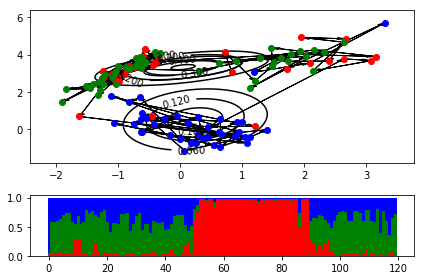

In [2]:
class HMMGibbs:
    def plotPoints(self,data,affilitation,means,covs,affilitationProb):
        #data[i]: X_i (Observation)
        #affilitation[i] : Z_i 의 예측치(Latent state)
        #means: 각 군집의 2차원 좌표의 평균값
        #covs: 각 군집의 2차원 좌표의 covariance matrix
        #affiliationProb[i]: 시간 i의 Likelihood
        
        plt.figure(1)

        gs = gridspec.GridSpec(3,1)
        axarr0 = plt.subplot(gs[:2,:])

        types = [] #data에 포함된 군집
        for i in range(len(affilitation)):
            if affilitation[i] in types:
                pass
            else:
                types.append(affilitation[i])

        for i in range(len(data)):
            if i >= 1:
                axarr0.arrow(data[i-1][0],data[i-1][1],data[i][0]-data[i-1][0],data[i][1]-data[i-1][1],head_width=0.1,head_length=0.15,fc='k',ec='k',length_includes_head=True)

        colors = [ 'r', 'g', 'b', 'y', 'k']
        totalX = []
        totalY = []
        for j in range(len(types)):
            x = []
            y = []
            for i in range(len(data)):
                if affilitation[i] == types[j]:
                    x.append(data[i][0])
                    y.append(data[i][1])
                    totalX.append(data[i][0])
                    totalY.append(data[i][1])
            axarr0.plot(x,y,colors[j%len(colors)]+'o')

        gridX = np.arange(min(totalX)-0.1*(max(totalX)-min(totalX)),max(totalX)+0.1*(max(totalX)-min(totalX)), (max(totalX)-min(totalX))/100)
        gridY = np.arange(min(totalY)-0.1*(max(totalY)-min(totalY)),max(totalY)+0.1*(max(totalY)-min(totalY)), (max(totalY)-min(totalY))/100)
        meshX, meshY = np.meshgrid(gridX,gridY)

        for j in range(len(types)):
            Z = np.zeros(shape=(len(gridY),len(gridX)),dtype=float)
            for itr1 in range(len(meshX)):
                for itr2 in range(len(meshX[itr1])):
                    Z[itr1][itr2] = stats.multivariate_normal.pdf( [meshX[itr1][itr2],meshY[itr1][itr2]], mean=means[j], cov=covs[j])
            CS = axarr0.contour(meshX,meshY,Z,3,colors='k')
            axarr0.clabel(CS,inline=1,fontsize=10)

        axarr1 = plt.subplot(gs[2, :])

        affilitationProbTranspose = []
        for i in range(len(types)):
            temp = []
            for j in range(len(data)):
                temp.append(affilitationProb[j][i])
            affilitationProbTranspose.append(temp)

        temp = np.zeros(len(data))
        for i in range(len(types)):
            axarr1.bar(range(len(data)),affilitationProbTranspose[i],width=1.0,bottom=temp,color=colors[i],edgecolor="none")
            for j in range(len(data)):
                temp[j] = temp[j] + affilitationProbTranspose[i][j]

        plt.tight_layout()
        #plt.savefig('./log/hmm_plot.png')

    def initialize(self,data,k):
        #k: 군집 개수
        #transition(=전이 확률), initial(=초기 확률)을 1/k 로 초기값 설정
        #Z_i를 0,1,...,k-1 중 random하게 j로 두고, affilitatioProb[i][j]=1,estimatedLabel[i]=j로 설정
        #means, covs : 같은 군집으로 분류된 X_i들의 2차원 좌표 평균값, covariance matrix
        
        transition = []
        initial = []
        for i in range(k):
            temp = []
            initial.append(1.0/float(k))
            for j in range(k):
                temp.append(1.0/float(k))
            transition.append(temp)

        dataCluster = []
        for j in range(k):
            dataCluster.append([])

        affilitationProb = []
        estimatedLabel = []
        for i in range(len(data)):
            temp = []
            for j in range(k):
                temp.append(0.0)
            affilitationProb.append(temp)

            idx = random.randrange(0,k)
            dataCluster[idx].append(data[i])
            affilitationProb[i][idx] = 1.0
            estimatedLabel.append(idx)

        means = []
        for j in range(k):
            means.append(np.mean(dataCluster[j],axis=0))

        covs = []
        for j in range(k):
            covs.append(np.cov(np.array(dataCluster[j]).T))

        return means,covs,transition,initial,affilitationProb,estimatedLabel

    def inferenceSampling(self,k,data,itr):
        means,covs,transition,initial,affilitationProb,estimatedLabel = self.initialize(data,k) #초기값 설정
        # 계산 결과값 출력
        for i in range(itr):
            #print ('------------------------------------------------------------------------------------')
            #print ('Iteration : ', i)
            #print ('------------------------------------------------------------------------------------')
            #print ('Means : ' + str(means))
            #print ('Covs : ' + str(covs))
            #print ('Affilitation Prob. : ' + str(affilitationProb))

            for j in range(len(data)):
                estimatedLabel[j],affilitationProb[j] = self.sampleLabel(k,data[j],means,covs,transition,initial,estimatedLabel,j,len(data)) #j 번째 잠재 변수 할당
                means, covs, transition, initial = self.learningParameters(data,estimatedLabel,affilitationProb,k) #parameter 갱신

            self.plotPoints(data, estimatedLabel, means, covs, affilitationProb)
        return means, covs, transition, affilitationProb, estimatedLabel

    def learningParameters(self,data,estimatedLabel,affilitationProb,k):
        #초기화 및 normalize
        initial = []
        for i in range(k):
            initial.append(0.001)
        initial[int(estimatedLabel[0])] = 1.0
        normalize = 0.0
        for i in range(k):
            normalize = normalize + initial[i]
        for i in range(k):
            initial[i] = initial[i] / normalize
            
        #전이 행렬(transition matrix)을 구성
        transition = []
        for i in range(k):
            temp = []
            for j in range(k):
                temp.append(0.001)
            transition.append(temp)
        for i in range(len(data)-1):
            transition[int(estimatedLabel[i])][int(estimatedLabel[i+1])] = transition[int(estimatedLabel[i])][int(estimatedLabel[i+1])] + 1.0
        
        #전이 행렬의 각 행을 normalize
        for i in range(k):
            normalize = 0.0
            for j in range(k):
                normalize = normalize + transition[i][j]
            for j in range(k):
                transition[i][j] = transition[i][j] / normalize

        means = []
        firstindex = 0
        for j in range(k):
            temp = data[firstindex] * affilitationProb[firstindex][j]
            normalize = 0.0
            for i in range(1,len(data)):
                temp = temp + data[i] * affilitationProb[i][j]
                normalize = normalize + affilitationProb[i][j]
            temp = temp / normalize
            means.append(temp)

        covs = []
        for j in range(k):
            temp = (data[0] - means[j]) * (data[0] - means[j]) * affilitationProb[0][j]
            for i in range(1,len(data)):
                temp = temp + np.outer((data[i] - means[j]),(data[i] - means[j])) * affilitationProb[i][j]
                normalize = normalize + affilitationProb[i][j]
            temp = temp / normalize
            covs.append(temp)

        return means,covs,transition,initial

    def sampleLabel(self,k,instance,means,covs,transition,initial,estimatedLabel,j,length):
        # j : 잠재 변수의 index
        loglikelihood = []
        likelihood = []
        normalize = 0
        for i in range(k):
            if length == j+1: # 마지막 잠재 변수; next state 존재하지 않음
                logLikelihoodNextState = 0
            else:
                logLikelihoodNextState = np.log(transition[i][int(estimatedLabel[j+1])])
            if j == 0: 
                logLikelihoodPrevState = np.log(initial[i])
            else:
                logLikelihoodPrevState = np.log(transition[int(estimatedLabel[j-1])][i])
            covs[i] = covs[i] + 1.0 * np.array([[1.0, 0.0], [0.0, 1.0]])

            logLikelihoodObservation = np.log(stats.multivariate_normal(means[i],covs[i]).pdf(instance))
            loglikelihood.append(logLikelihoodNextState+logLikelihoodPrevState+logLikelihoodObservation)
            likelihood.append(np.exp(loglikelihood[i]) + 0.001)
            normalize = normalize + likelihood[i]

        # normalize 과정
        for i in range(k):
            likelihood[i] = likelihood[i] / normalize

        sample = np.random.multinomial(1,likelihood,size=1)
        ret = -1
        for i in range(k):
            if sample[0][i] > 0.5:
                ret = i
        return ret,likelihood

if __name__=="__main__":
    random.seed(0)
    np.random.seed(0)

    trueChange = np.concatenate( ( np.zeros(20) , np.ones(30), np.ones(40)*2.0 , np.zeros(10) , np.ones(20) ) , axis = 0)
    trueAffilitationProb = []
    for i in range(len(trueChange)):
        temp = []
        for j in range(3):
            if trueChange[i] == j:
                temp.append(1)
            else:
                temp.append(0)
        trueAffilitationProb.append(temp)

    trueMean = [ [2,4], [-1,3], [0,0] ]
    #trueCov = [ [[0.9,0.5],[0.5,0.9]] , [[0.4,0.6],[0.5,0.9]], [[1.0,-0.5],[-0.5,1.0]] ]
    trueCov = [[[0.45, 0.25], [0.25, 0.45]], [[0.2, 0.3], [0.25, 0.45]], [[0.5, -0.25], [-0.25, 0.5]]]

    data = []
    for i in range(len(trueChange)):
        data.append(np.random.multivariate_normal(trueMean[int(trueChange[i])],trueCov[int(trueChange[i])],1)[0])

    print ( "True Change : ",trueChange)
    print ( "Data : ",data)

    hmm = HMMGibbs()
    hmm.plotPoints(data,trueChange,trueMean,trueCov,trueAffilitationProb)
    means, covs, transition, affilitationProb, estimatedLabel = hmm.inferenceSampling(3,data,20)
    hmm.plotPoints(data, estimatedLabel, means,covs, affilitationProb)
    

## 결과해석부
첫 번째 그래프에서 특정 색으로 칠해진 점은 각 군집을 나타냅니다. 두 번째 그래프는 시간에 따라 각각의 군집에 속할 확률이 나타나 있습니다. 

시행횟수(241번째 line, inferenceSampling method의 3번째 argument)를 조절하며 참값과 비교해볼 수 있습니다.

깁스 샘플링 기반의 군집화는 최적화의 관점에서 작동하지 않기에, 몇몇 구간에서는 우도가 개선되지 않을 수 있습니다.